In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import csv
import sys
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df_limpio = pd.read_csv('../datos/output/datos-Unidos-limpios.csv', index_col=0) 

In [4]:
df_limpio.head(1)

,NOMBRE DE ÓRGANO SUPERIOR,NOMBRE DEL CUERPO,NOMBRE DE LA UNIDAD DE GESTIÓN,CATEGORÍA ECONÓMICA,FUENTE DE INGRESOS,ESPECIES DE INGRESOS,DETALLE,VALOR DE PREVISIÓN ACTUALIZADO,VALOR PUBLICADO,VALOR REALIZADO,PORCENTAJE REALIZADO,FECHA DE LANZAMIENTO,AÑO FISCAL
0,Advocacia-Geral da União,advocacia-geral da união - unidades com víncul...,coord. geral de orc. fin. e anal. cont. - agu,receitas correntes,outras receitas correntes,"bens, direitos e valores incorporados ao patr",rec.divida ativa nao tributaria de outras rec,0.0,0.0,1297.13,0.0,2013-12-31,NaN


In [5]:
df_organos_realizado = df_limpio.groupby("NOMBRE DE ÓRGANO SUPERIOR").sum(numeric_only=True).reset_index()[["NOMBRE DE ÓRGANO SUPERIOR", "VALOR REALIZADO"]]
df_organos_realizado= df_organos_realizado.sort_values(by="VALOR REALIZADO", ascending=False).head(5)
df_organos_realizado

,NOMBRE DE ÓRGANO SUPERIOR,VALOR REALIZADO
7,ministério da economia,1.519717e+13
0,Advocacia-Geral da União,8.931734e+12
8,ministério da educação,1.353393e+11
9,ministério da infraestrutura,8.577935e+10
18,ministério de minas e energia,7.903406e+10


Observamos que dentro del total los ministerios mas representativos con respecto al valor recaudado son estos 5 como podemos 
observar en tambien en la grafica

In [6]:
df_organos_prevision = df_limpio.groupby("NOMBRE DE ÓRGANO SUPERIOR").sum(numeric_only=True).reset_index()[["NOMBRE DE ÓRGANO SUPERIOR", "VALOR DE PREVISIÓN ACTUALIZADO"]]
df_organos_prevision.sort_values(by="VALOR DE PREVISIÓN ACTUALIZADO", ascending=False).head(5)
df_organos_prevision= df_organos_prevision.head(5)
df_organos_prevision

,NOMBRE DE ÓRGANO SUPERIOR,VALOR DE PREVISIÓN ACTUALIZADO
0,Advocacia-Geral da União,8.360960e+12
1,advocacia-geral da união,1.500874e+09
2,controladoria-geral da união,6.281828e+08
3,"ministério da agricultura, pecuária e abastec",5.383429e+10
4,ministério da cidadania,3.280797e+10


Observamos que dentro del total los ministerios mas representativos con respecto al valor de prevision son estos 5 como podemos 
observar en tambien en la grafica

In [7]:
df_organos_publicado = df_limpio.groupby("NOMBRE DE ÓRGANO SUPERIOR").sum(numeric_only=True).reset_index()[["NOMBRE DE ÓRGANO SUPERIOR", "VALOR PUBLICADO"]]
df_organos_publicado.sort_values(by="VALOR PUBLICADO", ascending=False).head(5)
df_organos_publicado = df_organos_publicado.head(5)
df_organos_publicado

,NOMBRE DE ÓRGANO SUPERIOR,VALOR PUBLICADO
0,Advocacia-Geral da União,2.564624e+12
1,advocacia-geral da união,0.000000e+00
2,controladoria-geral da união,0.000000e+00
3,"ministério da agricultura, pecuária e abastec",0.000000e+00
4,ministério da cidadania,0.000000e+00


Aqui observamos que solo publicaba la abogacia general de la union

C:\Users\HP\AppData\Local\Temp\ipykernel_18528\3665705457.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="NOMBRE DE ÓRGANO SUPERIOR", y="VALOR REALIZADO", data=df_organos_realizado, palette="viridis", ax=axs[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_18528\3665705457.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="NOMBRE DE ÓRGANO SUPERIOR", y="VALOR DE PREVISIÓN ACTUALIZADO", data=df_organos_prevision, palette="viridis", ax=axs[1])
C:\Users\HP\AppData\Local\Temp\ipykernel_18528\3665705457.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effec

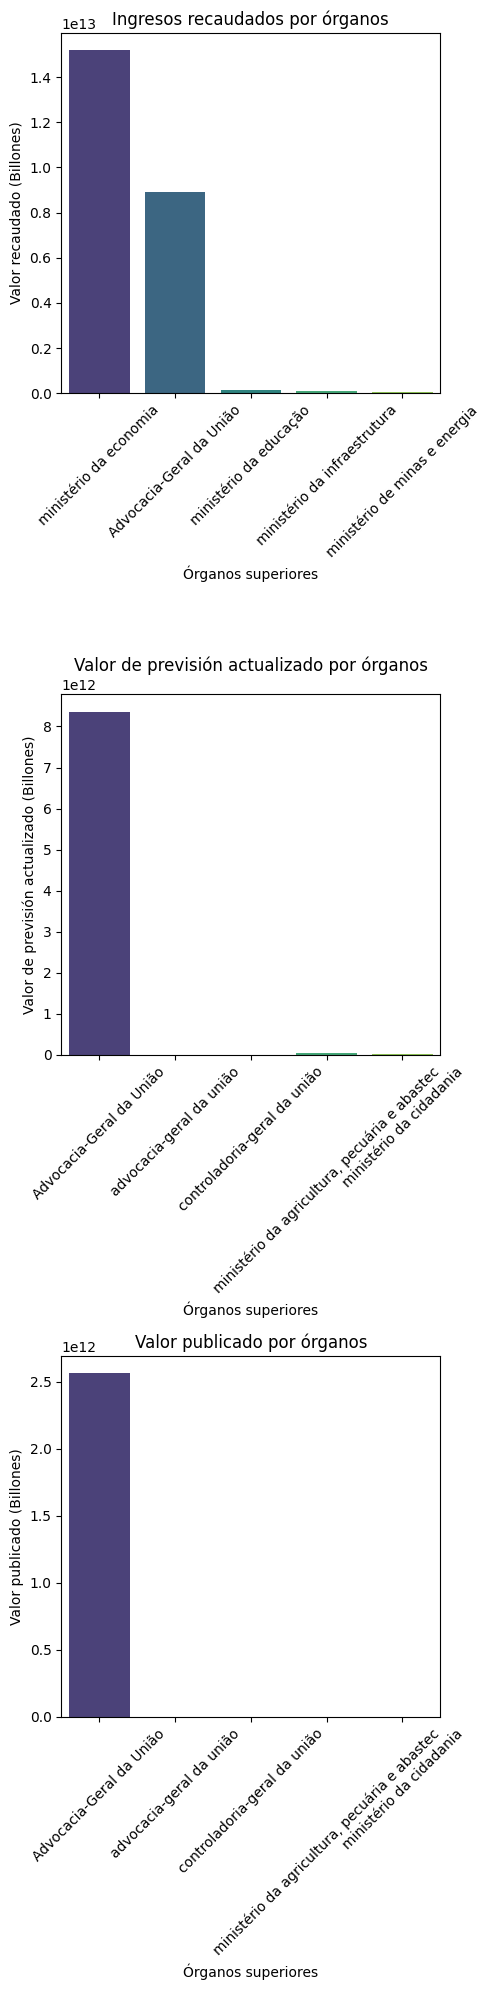

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(5, 20))

# Gráfico de barras para VALOR REALIZADO

sns.barplot(x="NOMBRE DE ÓRGANO SUPERIOR", y="VALOR REALIZADO", data=df_organos_realizado, palette="viridis", ax=axs[0])
axs[0].set_title("Ingresos recaudados por órganos")
axs[0].set_xlabel("Órganos superiores")
axs[0].set_ylabel("Valor recaudado (Billones)")
axs[0].tick_params(axis='x', rotation=45)

# Gráfico de barras para VALOR DE PREVISIÓN ACTUALIZADO
sns.barplot(x="NOMBRE DE ÓRGANO SUPERIOR", y="VALOR DE PREVISIÓN ACTUALIZADO", data=df_organos_prevision, palette="viridis", ax=axs[1])
axs[1].set_title("Valor de previsión actualizado por órganos")
axs[1].set_xlabel("Órganos superiores")
axs[1].set_ylabel("Valor de previsión actualizado (Billones)")
axs[1].tick_params(axis='x', rotation=45)

# Gráfico de barras para VALOR PUBLICADO
sns.barplot(x="NOMBRE DE ÓRGANO SUPERIOR", y="VALOR PUBLICADO", data=df_organos_publicado, palette="viridis", ax=axs[2])
axs[2].set_title("Valor publicado por órganos")
axs[2].set_xlabel("Órganos superiores")
axs[2].set_ylabel("Valor publicado (Billones)")
axs[2].tick_params(axis='x', rotation=45)

# Ajustar layout
plt.tight_layout()
plt.show()

In [9]:
df_limpio.head(1)

,NOMBRE DE ÓRGANO SUPERIOR,NOMBRE DEL CUERPO,NOMBRE DE LA UNIDAD DE GESTIÓN,CATEGORÍA ECONÓMICA,FUENTE DE INGRESOS,ESPECIES DE INGRESOS,DETALLE,VALOR DE PREVISIÓN ACTUALIZADO,VALOR PUBLICADO,VALOR REALIZADO,PORCENTAJE REALIZADO,FECHA DE LANZAMIENTO,AÑO FISCAL
0,Advocacia-Geral da União,advocacia-geral da união - unidades com víncul...,coord. geral de orc. fin. e anal. cont. - agu,receitas correntes,outras receitas correntes,"bens, direitos e valores incorporados ao patr",rec.divida ativa nao tributaria de outras rec,0.0,0.0,1297.13,0.0,2013-12-31,NaN


In [10]:
df_cuerpos_realizado= df_limpio.groupby("NOMBRE DEL CUERPO").sum(numeric_only=True).reset_index()[["NOMBRE DEL CUERPO", "VALOR REALIZADO"]]
df_cuerpos_realizado= df_cuerpos_realizado.sort_values(by="VALOR REALIZADO", ascending=False).head(5)
df_cuerpos_realizado

,NOMBRE DEL CUERPO,VALOR REALIZADO
201,ministério da economia - unidades com vínculo ...,1.898985e+13
120,fundo do regime geral da previdência social,2.833594e+12
0,20101.0,1.201802e+12
105,fundo de amparo ao trabalhador,3.247877e+11
196,instituto nacional do seguro social,3.162566e+11


In [11]:
df_cuerpos_prevision = df_limpio.groupby("NOMBRE DEL CUERPO").sum(numeric_only=True).reset_index()[["NOMBRE DEL CUERPO", "VALOR DE PREVISIÓN ACTUALIZADO"]]
df_cuerpos_prevision.sort_values(by="VALOR DE PREVISIÓN ACTUALIZADO", ascending=False).head(5)
df_cuerpos_prevision= df_cuerpos_prevision.head(5)
df_cuerpos_prevision

,NOMBRE DEL CUERPO,VALOR DE PREVISIÓN ACTUALIZADO
0,20101.0,2.677671e+12
1,advocacia-geral da união - unidades com víncul...,1.502019e+09
2,agência de desenvolvimento da amazônia,0.000000e+00
3,agência espacial brasileira,8.173424e+07
4,agência nacional de aviação civil,3.014387e+09


In [12]:
df_cuerpos_publicado = df_limpio.groupby("NOMBRE DEL CUERPO").sum(numeric_only=True).reset_index()[["NOMBRE DEL CUERPO", "VALOR PUBLICADO"]]
df_cuerpos_publicado.sort_values(by="VALOR PUBLICADO", ascending=False).head(5)
df_cuerpos_publicado = df_cuerpos_publicado.head(5)
df_cuerpos_publicado

,NOMBRE DEL CUERPO,VALOR PUBLICADO
0,20101.0,1.194577e+11
1,advocacia-geral da união - unidades com víncul...,0.000000e+00
2,agência de desenvolvimento da amazônia,0.000000e+00
3,agência espacial brasileira,0.000000e+00
4,agência nacional de aviação civil,0.000000e+00


Con respecto al total solo tenemos un valor publicado en este caso no tenemos el nombre del cuerpo siempre
hablando de billones

C:\Users\HP\AppData\Local\Temp\ipykernel_18528\2485271996.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="NOMBRE DEL CUERPO", y="VALOR REALIZADO", data=df_cuerpos_realizado, palette="viridis", ax=axs[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_18528\2485271996.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="NOMBRE DEL CUERPO", y="VALOR DE PREVISIÓN ACTUALIZADO", data=df_cuerpos_prevision, palette="viridis", ax=axs[1])
C:\Users\HP\AppData\Local\Temp\ipykernel_18528\2485271996.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplo

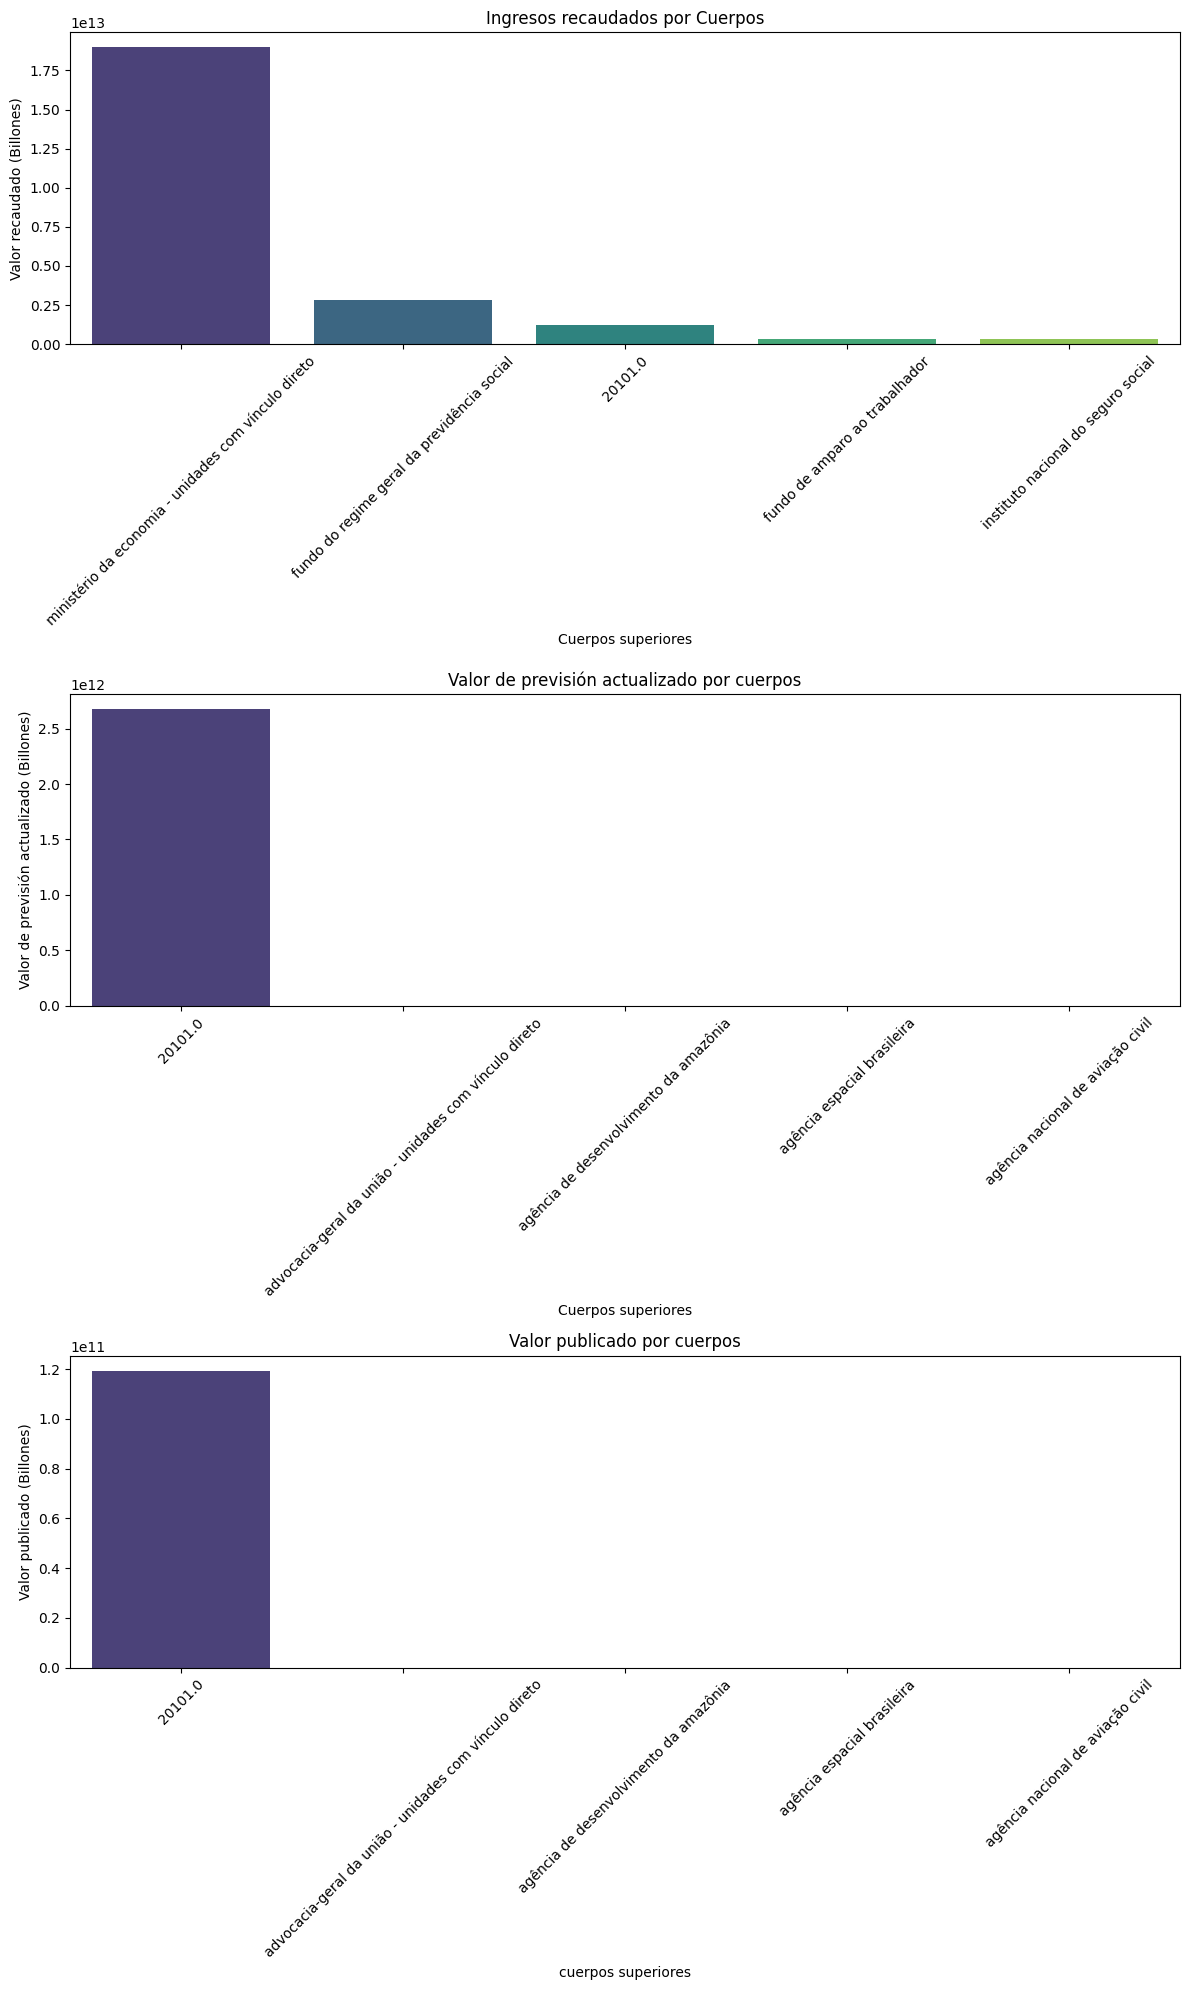

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(12, 20))

# Gráfico de barras para VALOR REALIZADO

sns.barplot(x="NOMBRE DEL CUERPO", y="VALOR REALIZADO", data=df_cuerpos_realizado, palette="viridis", ax=axs[0])
axs[0].set_title("Ingresos recaudados por Cuerpos")
axs[0].set_xlabel("Cuerpos superiores")
axs[0].set_ylabel("Valor recaudado (Billones)")
axs[0].tick_params(axis='x', rotation=45)

# Gráfico de barras para VALOR DE PREVISIÓN ACTUALIZADO
sns.barplot(x="NOMBRE DEL CUERPO", y="VALOR DE PREVISIÓN ACTUALIZADO", data=df_cuerpos_prevision, palette="viridis", ax=axs[1])
axs[1].set_title("Valor de previsión actualizado por cuerpos")
axs[1].set_xlabel("Cuerpos superiores")
axs[1].set_ylabel("Valor de previsión actualizado (Billones)")
axs[1].tick_params(axis='x', rotation=45)

# Gráfico de barras para VALOR PUBLICADO
sns.barplot(x="NOMBRE DEL CUERPO", y="VALOR PUBLICADO", data=df_cuerpos_publicado, palette="viridis", ax=axs[2])
axs[2].set_title("Valor publicado por cuerpos")
axs[2].set_xlabel("cuerpos superiores")
axs[2].set_ylabel("Valor publicado (Billones)")
axs[2].tick_params(axis='x', rotation=45)

# Ajustar layout
plt.tight_layout()
plt.show()

In [14]:
df_categoria_realizado= df_limpio.groupby("CATEGORÍA ECONÓMICA").sum(numeric_only=True).reset_index()[["CATEGORÍA ECONÓMICA", "VALOR REALIZADO"]]
df_categoria_realizado= df_categoria_realizado.sort_values(by="VALOR REALIZADO", ascending=False).head(5)
df_categoria_realizado

,CATEGORÍA ECONÓMICA,VALOR REALIZADO
1,receitas correntes,1.202519e+13
3,receitas de capital,1.200415e+13
0,Valor desconocido,3.271686e+11
2,receitas correntes - intra-orçamentárias,2.805806e+11
4,receitas de capital - intra-orçamentárias,2.141127e+10


In [15]:
df_categoria_prevision = df_limpio.groupby("CATEGORÍA ECONÓMICA").sum(numeric_only=True).reset_index()[["CATEGORÍA ECONÓMICA", "VALOR DE PREVISIÓN ACTUALIZADO"]]
df_categoria_prevision.sort_values(by="VALOR DE PREVISIÓN ACTUALIZADO", ascending=False).head(5)
df_categoria_prevision = df_categoria_prevision.head(5)
df_categoria_prevision

,CATEGORÍA ECONÓMICA,VALOR DE PREVISIÓN ACTUALIZADO
0,Valor desconocido,1.016380e+12
1,receitas correntes,1.314475e+13
2,receitas correntes - intra-orçamentárias,2.694278e+11
3,receitas de capital,1.349986e+13
4,receitas de capital - intra-orçamentárias,1.080841e+10


In [16]:
df_categoria_publicado = df_limpio.groupby("CATEGORÍA ECONÓMICA").sum(numeric_only=True).reset_index()[["CATEGORÍA ECONÓMICA", "VALOR PUBLICADO"]]
df_categoria_publicado.sort_values(by="VALOR PUBLICADO", ascending=False).head(5)
df_categoria_publicado = df_categoria_publicado.head(5)
df_categoria_publicado

,CATEGORÍA ECONÓMICA,VALOR PUBLICADO
0,Valor desconocido,1.764756e+11
1,receitas correntes,5.096879e+12
2,receitas correntes - intra-orçamentárias,0.000000e+00
3,receitas de capital,3.620769e+06
4,receitas de capital - intra-orçamentárias,0.000000e+00


C:\Users\HP\AppData\Local\Temp\ipykernel_18528\615735155.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="CATEGORÍA ECONÓMICA", y="VALOR REALIZADO", data=df_categoria_realizado, palette="viridis", ax=axs[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_18528\615735155.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="CATEGORÍA ECONÓMICA", y="VALOR DE PREVISIÓN ACTUALIZADO", data=df_categoria_prevision, palette="viridis", ax=axs[1])
C:\Users\HP\AppData\Local\Temp\ipykernel_18528\615735155.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.b

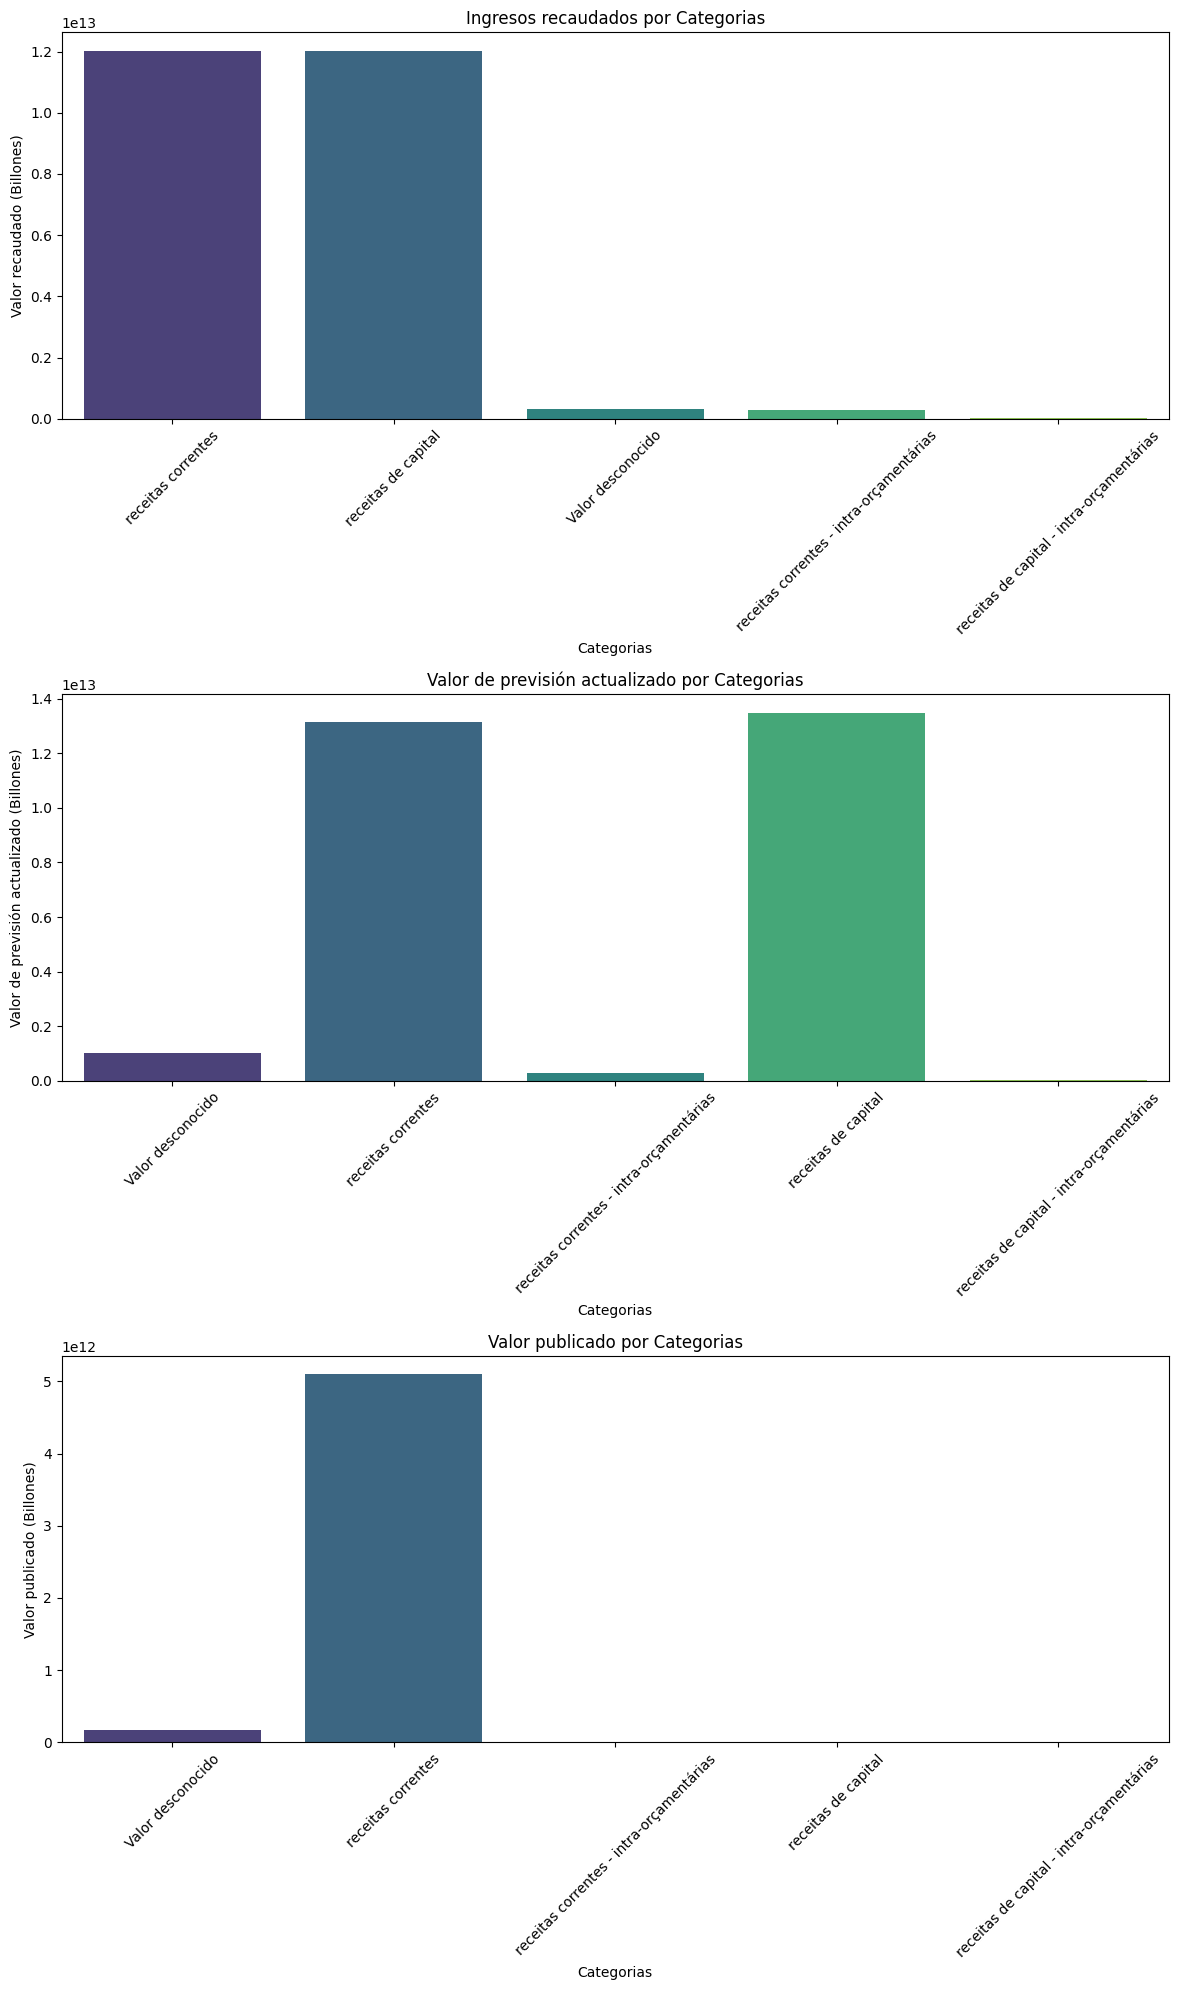

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(12, 20))

# Gráfico de barras para VALOR REALIZADO

sns.barplot(x="CATEGORÍA ECONÓMICA", y="VALOR REALIZADO", data=df_categoria_realizado, palette="viridis", ax=axs[0])
axs[0].set_title("Ingresos recaudados por Categorias")
axs[0].set_xlabel("Categorias")
axs[0].set_ylabel("Valor recaudado (Billones)")
axs[0].tick_params(axis='x', rotation=45)

# Gráfico de barras para VALOR DE PREVISIÓN ACTUALIZADO
sns.barplot(x="CATEGORÍA ECONÓMICA", y="VALOR DE PREVISIÓN ACTUALIZADO", data=df_categoria_prevision, palette="viridis", ax=axs[1])
axs[1].set_title("Valor de previsión actualizado por Categorias")
axs[1].set_xlabel("Categorias")
axs[1].set_ylabel("Valor de previsión actualizado (Billones)")
axs[1].tick_params(axis='x', rotation=45)

# Gráfico de barras para VALOR PUBLICADO
sns.barplot(x="CATEGORÍA ECONÓMICA", y="VALOR PUBLICADO", data=df_categoria_publicado, palette="viridis", ax=axs[2])
axs[2].set_title("Valor publicado por Categorias")
axs[2].set_xlabel("Categorias")
axs[2].set_ylabel("Valor publicado (Billones)")
axs[2].tick_params(axis='x', rotation=45)

# Ajustar layout
plt.tight_layout()
plt.show()

Evolucion temporal de los ingresos

In [18]:
df_limpio.head(1)

,NOMBRE DE ÓRGANO SUPERIOR,NOMBRE DEL CUERPO,NOMBRE DE LA UNIDAD DE GESTIÓN,CATEGORÍA ECONÓMICA,FUENTE DE INGRESOS,ESPECIES DE INGRESOS,DETALLE,VALOR DE PREVISIÓN ACTUALIZADO,VALOR PUBLICADO,VALOR REALIZADO,PORCENTAJE REALIZADO,FECHA DE LANZAMIENTO,AÑO FISCAL
0,Advocacia-Geral da União,advocacia-geral da união - unidades com víncul...,coord. geral de orc. fin. e anal. cont. - agu,receitas correntes,outras receitas correntes,"bens, direitos e valores incorporados ao patr",rec.divida ativa nao tributaria de outras rec,0.0,0.0,1297.13,0.0,2013-12-31,NaN


In [19]:
df_anios = df_limpio.groupby("AÑO FISCAL").sum(numeric_only=True)[["VALOR DE PREVISIÓN ACTUALIZADO","VALOR REALIZADO"]].reset_index()
df_anios[["VALOR DE PREVISIÓN ACTUALIZADO","VALOR REALIZADO"]] = df_anios[["VALOR DE PREVISIÓN ACTUALIZADO","VALOR REALIZADO"]] / 1000000000000 # pasamos a billones
df_anios

,AÑO FISCAL,VALOR DE PREVISIÓN ACTUALIZADO,VALOR REALIZADO
0,2013.0,1.197313,0.883226
1,2014.0,2.175947,2.097992
2,2015.0,2.668001,2.410841
3,2016.0,1.869605,1.821254
4,2017.0,2.143341,1.795808
5,2018.0,2.881939,2.277015
6,2019.0,2.878113,2.134649
7,2020.0,2.665544,2.157707
8,2021.0,3.814896,2.576406


C:\Users\HP\AppData\Local\Temp\ipykernel_18528\506252680.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="AÑO FISCAL", y="VALOR DE PREVISIÓN ACTUALIZADO", data=df_anios, ax=axes[0], palette="viridis")
C:\Users\HP\AppData\Local\Temp\ipykernel_18528\506252680.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="AÑO FISCAL", y="VALOR REALIZADO", data=df_anios, ax=axes[1], palette="viridis")


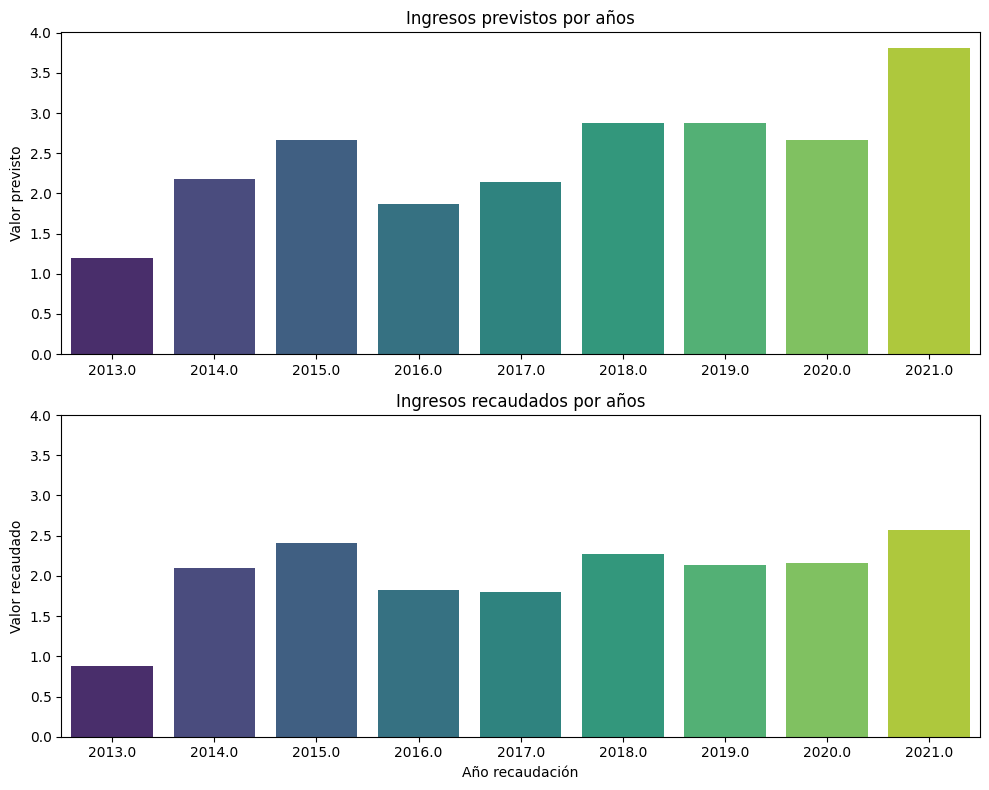

In [20]:

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de barras para valor previsto con paleta "viridis"
sns.barplot(x="AÑO FISCAL", y="VALOR DE PREVISIÓN ACTUALIZADO", data=df_anios, ax=axes[0], palette="viridis")
# Añadir línea de evolución
axes[0].set_title("Ingresos previstos por años")
axes[0].set_xlabel("")
axes[0].set_ylabel("Valor previsto")

# Gráfico de barras para valor recaudado con paleta "viridis"
sns.barplot(x="AÑO FISCAL", y="VALOR REALIZADO", data=df_anios, ax=axes[1], palette="viridis")
axes[1].set_title("Ingresos recaudados por años")
axes[1].set_xlabel("Año recaudación")
axes[1].set_ylabel("Valor recaudado")
axes[1].set_ylim(0, 4)

# Ajustar el layout
plt.tight_layout()  # Ajustar el layout para que no se solapen
plt.show()

In [21]:
df_limpio.head(1)

,NOMBRE DE ÓRGANO SUPERIOR,NOMBRE DEL CUERPO,NOMBRE DE LA UNIDAD DE GESTIÓN,CATEGORÍA ECONÓMICA,FUENTE DE INGRESOS,ESPECIES DE INGRESOS,DETALLE,VALOR DE PREVISIÓN ACTUALIZADO,VALOR PUBLICADO,VALOR REALIZADO,PORCENTAJE REALIZADO,FECHA DE LANZAMIENTO,AÑO FISCAL
0,Advocacia-Geral da União,advocacia-geral da união - unidades com víncul...,coord. geral de orc. fin. e anal. cont. - agu,receitas correntes,outras receitas correntes,"bens, direitos e valores incorporados ao patr",rec.divida ativa nao tributaria de outras rec,0.0,0.0,1297.13,0.0,2013-12-31,NaN


In [ ]:
df_melt = df_anios.melt(id_vars=['AÑO FISCAL'], var_name='Valores', value_name='total')
df_melt             #esto no para la presentacion

,AÑO FISCAL,Valores,total
0,2013.0,VALOR DE PREVISIÓN ACTUALIZADO,1.197313
1,2014.0,VALOR DE PREVISIÓN ACTUALIZADO,2.175947
2,2015.0,VALOR DE PREVISIÓN ACTUALIZADO,2.668001
3,2016.0,VALOR DE PREVISIÓN ACTUALIZADO,1.869605
4,2017.0,VALOR DE PREVISIÓN ACTUALIZADO,2.143341
5,2018.0,VALOR DE PREVISIÓN ACTUALIZADO,2.881939
6,2019.0,VALOR DE PREVISIÓN ACTUALIZADO,2.878113
7,2020.0,VALOR DE PREVISIÓN ACTUALIZADO,2.665544
8,2021.0,VALOR DE PREVISIÓN ACTUALIZADO,3.814896
9,2013.0,VALOR REALIZADO,0.883226


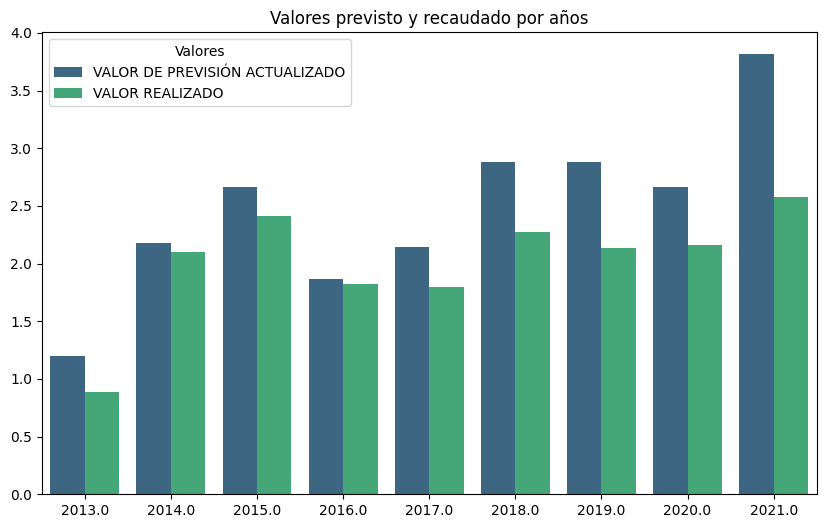

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x="AÑO FISCAL", y="total", hue="Valores", palette="viridis", data=df_melt)

plt.title("Valores previsto y recaudado por años")
plt.xlabel("")
plt.ylabel("")
plt.show()


In [33]:
df_limpio.head(1)

,NOMBRE DE ÓRGANO SUPERIOR,NOMBRE DEL CUERPO,NOMBRE DE LA UNIDAD DE GESTIÓN,CATEGORÍA ECONÓMICA,FUENTE DE INGRESOS,ESPECIES DE INGRESOS,DETALLE,VALOR DE PREVISIÓN ACTUALIZADO,VALOR PUBLICADO,VALOR REALIZADO,PORCENTAJE REALIZADO,FECHA DE LANZAMIENTO,AÑO FISCAL
0,Advocacia-Geral da União,advocacia-geral da união - unidades com víncul...,coord. geral de orc. fin. e anal. cont. - agu,receitas correntes,outras receitas correntes,"bens, direitos e valores incorporados ao patr",rec.divida ativa nao tributaria de outras rec,0.0,0.0,1297.13,0.0,2013-12-31,NaN


C:\Users\HP\AppData\Local\Temp\ipykernel_18528\1382941136.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Tipo de valor')


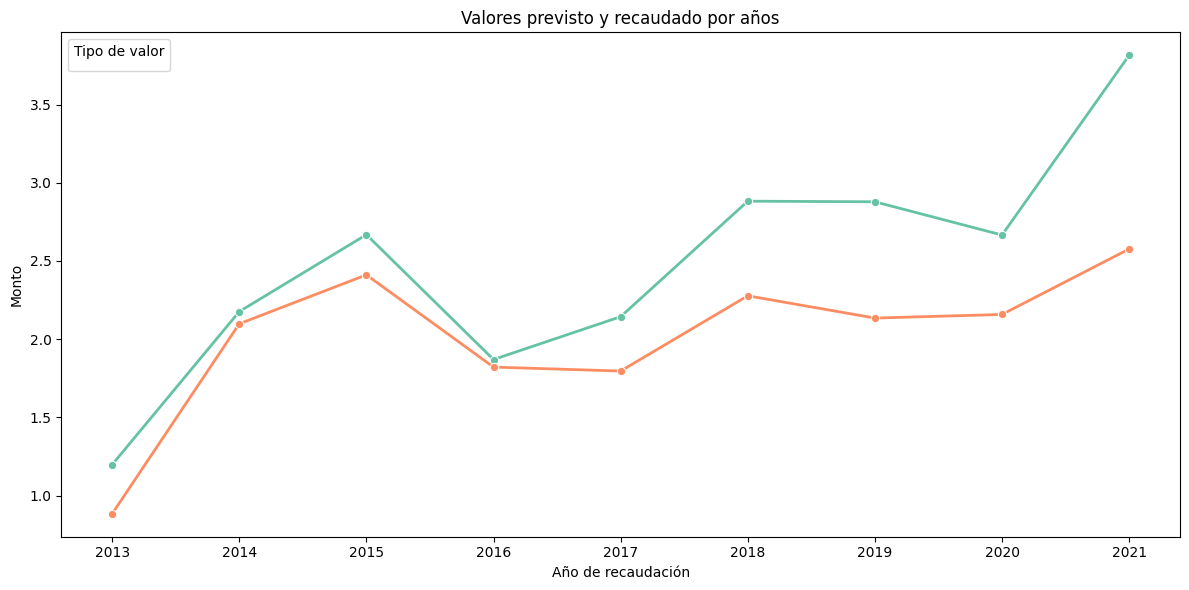

In [43]:
# Convertir a formato largo
df_melt = pd.melt(df_anios, id_vars=['AÑO FISCAL'], var_name='Valores', value_name='total')

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x="AÑO FISCAL", y="total", hue="Valores", data=df_melt, marker="o", linewidth=2, palette="Set2", legend=False)

# Título y etiquetas
plt.title("Valores previsto y recaudado por años")
plt.xlabel("Año de recaudación")
plt.ylabel("Monto")
plt.legend(title='Tipo de valor')
plt.tight_layout()

plt.show()

Aquí se puede observar gráficamente como siempre se preve una recaudación mayor que la que realmente se obtiene.
Se ve como en los años 2014,2015,2016 si que se acerca más pero durante el 2017,2018 y 2019 hay gran diferencia hasta 2020 que se acerca de nuevo .